#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 3 (40 marks)**

##Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A3_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 

# Student name:

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


##**Part 1: Linear Regression:**  **(25 marks)**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [400]:
# INSERT your code (or comment) here
import pandas as pd
data= pd.read_csv("E://PC Backup/Others/fiverr/20200914 regression/weather_dataset.csv")
data.recording_date_time= pd.to_datetime(data.recording_date_time, utc= True)
data.recording_date_time.dt.year

data.dtypes
#precipitation type is a categorical data type. converting it to dummies
data= pd.get_dummies(data)

#splitting into train and test dataset
train_data= data.loc[data.recording_date_time.dt.year<2015]
test_data= data.loc[data.recording_date_time.dt.year>=2015]

#drop the column
train_data= train_data.drop(columns= ['recording_date_time'])
test_data= test_data.drop(columns= ['recording_date_time'])
print("shape of train set")
print(train_data.shape)

print("shape of test set")
test_data.shape

shape of train set
(78910, 10)
shape of test set


(17543, 10)

2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

,temperature
temperature,1.000000
apparent_temperature,0.992413
humidity,-0.631624
wind_speed,0.010981
wind_bearing,0.029754
visibility,0.371181
cloud_cover,NaN
pressure,-0.010212
precip_type_rain,0.578431
precip_type_snow,-0.578431


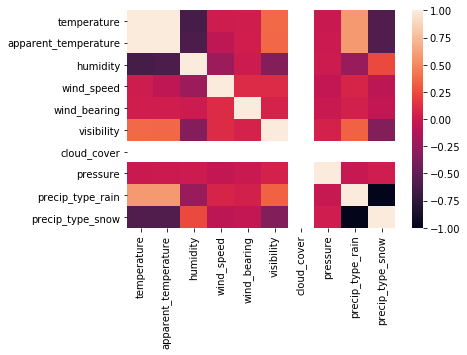

In [401]:
# INSERT your code (or comment) here
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns



selected_train_data.shape
sns.heatmap(train_data.corr())
train_data.corr()[['temperature']]


#### Insignificant features: 
- These features have correlation coefficient less than .25
- cloud_cover has all values same, hence insignificant
Insignificant features: **pressure, cloud_cover, wind_speed**

3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [402]:
# INSERT your code (or comment) here
from statsmodels import regression
import statsmodels.api as sm

#split into X, Y
X= train_data.drop(target, axis=1)
Y= train_data[target]

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

from sklearn.metrics import mean_absolute_error
print('train performance')
print(mean_absolute_error(Y, predictions))
target= 'temperature'
print('test set performance')
test_X= test_data.drop(target, axis=1)
test_X = sm.add_constant(test_X) # adding a constant
print(mean_absolute_error(test_data[target], model.predict(test_X)))



KeyError: "['precip_type'] not found in axis"

4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

In [ ]:
# INSERT your code (or comment) here
#maximum correlation with pressure
train_data.corr()[['pressure']]
print('wind speed shows max corr with pressure, fitting a model with these two:')

X= train_data[['pressure', 'wind_speed']]
Y= train_data[target]

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

from sklearn.metrics import mean_absolute_error

print('test set performance')
test_X= test_data[['pressure', 'wind_speed']]
test_X = sm.add_constant(test_X) # adding a constant
print(mean_absolute_error(test_data[target], model.predict(test_X)))
print('the performance of this model has slightly improved')




5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [431]:
# INSERT your answer in maximum five sentences.

from sklearn.model_selection import train_test_split
# train test split in 60-40
train_data, test_data= train_test_split(data.drop('recording_date_time', axis=1), test_size=.4,random_state= 1234)
print('train data shape:'+str(train_data.shape))
print('test data shape:'+str(test_data.shape))


#fit linear regression model without considering overfitting scenario and report the test performance
X= train_data.drop(target, axis=1)
Y= train_data[target]

from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(X, Y)
model.predict(test_X)


from sklearn.metrics import mean_absolute_error

print('test set performance')
target= 'temperature'
test_X= test_data.drop(target, axis=1)
print(mean_absolute_error(test_data[target], model.predict(test_X)))


train data shape:(57871, 10)
test data shape:(38582, 10)
test set performance
0.7418766443200456


In [432]:
#### optimal regularised linear regression model and report the test performance

from sklearn import linear_model
model = linear_model.Ridge(alpha=0.5)

model.fit(X, Y)
model.predict(test_X)


from sklearn.metrics import mean_absolute_error

print('test set performance')
test_X= test_data.drop(target, axis=1)

print(mean_absolute_error(test_data[target], model.predict(test_X)))



test set performance
0.7418752792978199


**Reason for performance variation** Preformance improves as regularization implemented in part 2 helps ensure that model does not overfit the data. What it means is that model is able to generalize well on unseen test data.

##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

No temperature can not be used for logistic regression model. It is a continuous variable and can not be used as target of a classification algorithm such as logistic regression

2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [433]:
# INSERT your code (or comment) here
#defining the target
data= pd.read_csv("E://PC Backup/Others/fiverr/20200914 regression/weather_dataset.csv")
data.precip_type.value_counts()
data.loc[data.precip_type=='rain', 'precip_type']=1
data.loc[data.precip_type=='snow', 'precip_type']=0


# train test split
train_data, test_data= train_test_split(data.drop('recording_date_time', axis=1), test_size=.4,random_state= 1234)
print('train data shape:'+str(train_data.shape))
print('test data shape:'+str(test_data.shape))

target= 'precip_type'




train data shape:(57871, 9)
test data shape:(38582, 9)


In [434]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X= train_data.drop(target, axis=1)
Y= train_data[target].astype('int64')

test_X= test_data.drop(target, axis=1)
test_Y= test_data[target].astype('int64')



model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(test_X, test_Y)

model.predict_proba(X)

pred= np.where((model.predict_proba(test_X)[:,1]>.45),1,0 )


 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

In [435]:
# INSERT your code (or comment) here
print(confusion_matrix(test_Y.values, pred[:], labels=[0,1]))
cm= confusion_matrix(test_Y.values, pred[:], labels=[0,1])
prediction_accuracy= (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[1,0]+cm[1,0])*100
print('prediction accuracy:'+str(prediction_accuracy))

from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support= precision_recall_fscore_support(test_Y.values, pred[:])

print('precision:'+str(precision[1]))
print('recall:'+str(recall[1]))

[[ 3839   656]
 [   68 34019]]
prediction accuracy:99.64204874453861
precision:0.9810814708002884
recall:0.9980051045853258


##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

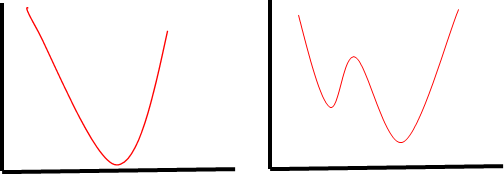





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)

c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)

a) The first graph represents a convex objective function because line joining any two points is above the curve. It has only one optimal point that is the global optimim

b) Learning rate can help to reach the convergence point. It can be varied by advanced optimization algorithms like SDG and adam

c) Using advanced optimizer such as SGD, ADAM we can reach the global minima. Appropriate activation function like relu helps and random initialization of say neural network also helps reach the global minima. 

A possible approach to reach is to:
- Divide the space into several samall convex sub spaces
- For each convex subspace, find the local minima
- Final Minima of all the local minimas